# COGS 108 - Final Project 

# Overview

In this project, I analyze the relationship between Yelp ratings and health inspection scores of restaurants within the state of North Carolina and explore the impact of average inspection frequency on Yelp scores for these restaurants. The dataframe central to my analysis corresponds specific restaurants to their average values for inspection score and frequency, which were extrapolated from a dataset that details inspection results over a timeline of 4 years. After using OLS regression and Pearson correlation to evaluate the relationships between the aforementioned variables, I've concluded that Yelp ratings are not a reliable indication of a restaurant's inspection score, and by extension, overall cleanliness. Furthermore, my findings have revealed that health inspection frequency is not a definitive measure of a restaurant's Yelp ratings and higher inspection frequencies do not correlate to higher Yelp ratings. 

# Name & GitHub

- Name: Timothy Oh
- GitHub Username: A15177697

# Research Question

Within the confines of a state, what is the relationship between a restaurant's Yelp ratings and their health inspection scores? Furthermore, how can a restaurant's average inspection frequency impact their Yelp ratings?

## Background and Prior Work

By law, restaurants within the United States are subject to routine health inspection checks that are conducted by professional inspectors. The possible inspection scores range from 0 to 100, with a score of 100 being a perfect rating. These health inspection scores are accessible by the public domain and all consumers can view these scores before they eat at an establishment. Within the past decade, researchers have been investigating the viability in using Yelp reviews to gauge the health inspection scores of restaurants. The relationship between these two variables could potentially bolster the efficiency of health inspectors by enabling them to utilize Yelp reviews to predetermine the cleanliness of restaurants and prioritize the ordering of their restaurant inspections. 

1) In 2013, Professor Michael Luca from Harvard Business School and Professor Yejin Choi from Stony Brook University led a group of graduate students in developing a model that predicts future inspection scores of restaurants in Seattle. Prior to conducting their analysis, these researchers found that the department of health had limited inspectors to dispatch to Seattle restaurants for inspection checks. As a result, the hygiene grades for many restaurants were unknown for extended periods of time, as there weren't enough inspectors to conduct health checks across all of the varying restaurants within the city. To curb this issue, these researchers mined online reviews from Yelp and utilized the public sentiment of restaurants as a proxy for determining the health inspection score of any given restaurant within the city. Their findings culminated in the development of a model, which uses Yelp's review data, to predict future inspection scores of restaurants at a success rate of 82%. 

The success of their model indicates that inspectors can potentially extrapolate the inspection score of a restaurant from its Yelp rating. Because the predictive accuracy of their model is relatively high, it's also possible to determine that there is a strong correlation between increasing Yelp ratings and overall inspection scores of restaurants. 

2) In 2019, Kristen Altenburger and Daniel Ho, both researchers at Stanford university, conducted an analysis on the predictive power of Yelp reviews using a machine learning model, trained with 13000 inspection results and 152000 yelp reviews of Seattle restaurants from 2006 to 2013. Their findings revealed that Yelp reviews are less effective than inpsection histories in predicting inspection scoring. They found that Yelp reviews did not provide any significant improvements in the prediction accuracy of inspection scores. These researchers fit the same SVM models developed in the 2013 study, with a much larger dataset of hygenic restaurants (restaurants with 0 inspection violations), and discovered that the accuracy of the inspection score predictions dropped from 83% to 69%. At the same time, they fit these SVM models with data strictly pertaining to the inspection history of the Seattle restaurants and found that the predictive accuracy of these models hovered around 71%. 

These findings determine that Yelp ratings are not reliable indicators of the overall cleanliness and inspection scores associated with restaurants. The lowered predictive accuracy of the SVM models developed in the 2013 study also lends credence to the notion that previous inspection results of restaurants, rather than Yelp ratings, operate as a more accurate metric for determining a restaurant's future inspection performance.

References (include links):
- 1) https://www3.cs.stonybrook.edu/~junkang/papers/hygiene2013.pdf
- 2) https://dho.stanford.edu/wp-content/uploads/WWW_Final.pdf

# Hypothesis


I believe data analysis of this topic will reveal that restaurants with greater Yelp ratings have higher inspection scores and restaurants with elevated inspection frequencies have higher Yelp ratings. Often, Yelp reviewers apply reductions to a restaurant's rating when they discover sanitary issues within the establishment, thus, I believe restaurants with higher Yelp ratings have fewer sanitary issues, and by extension, higher inspection scores. In a similar vein, I believe restaurants that conduct inspection checks on a more frequent basis exhibit a higher degree of hygiene, which can prompt Yelp reviewers to score the restaurants more favorably with higher ratings. 

# Dataset(s)

- Dataset Name: inspections.csv
- Link to the dataset: https://canvas.ucsd.edu/courses/12630/files?
- Number of observations: 18,466
 
The inspections.csv dataset details results for health inspection checks performed on restaurants within North Carolina over the course of a four-year period, from 2012 to 2016. With regards to my research topic, the observations of this file describe the overall score associated with restaurants' inspection checks and details the number of days between each restaurants' inspection checks during this time period.   

- Dataset Name: yelp.csv
- Link to the dataset: https://canvas.ucsd.edu/courses/12630/files?
- Number of observations: 3688

The yelp.csv dataset describes data revolving around Yelp reviews for restaurants located within North Carolina. This file includes information about the names, locations, Yelp ratings (on a scale from 1 to 5), Yelp review counts, and food items of these restaurants. 

I want to utilize both of these resources to create a new dataframe that observes the average inspection score, the average inspection frequency, and the yelp ratings for each restaurant in the NC region. Each restaurant has a unique phone number, thus we can match the observations of yelp.csv with details from inspections.csv by leveraging the numbers associated with each restaurant. For example, yelp.csv dictates that a restaurant with a phone number of 9102529724 has a rating of 2.5 and we can add this yelp rating to the observations corresponding to the restaurant with the same phone number within inspections.csv. 

Because inspections.csv often describes multiple observations for each unique restaurant, there are programmatic complications with viewing the trends of the research variables across many unique restaurants as each unique restaurant needs to be matched to multiple rows in the dataset. For this reason, I want to compute the average inspection score and frequency for each restaurant and implant these values in a new dataframe, which will allow me to correspond each observation with a unique restaurant, rather than match multiple rows to one restaurant.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df_inspections = pd.read_csv('inspections.csv')
df_yelp = pd.read_csv('yelp.csv')

# Data Cleaning

I first cleared columns of the inspection data that seemed impertinent towards answering my proposed research question. I also wanted to streamline the organization of the inspections dataframe so it was easier to reference overall. 

In [3]:
# drop columns impertinent to answering the research question
df_inspections = df_inspections.drop('top_match', 1)
df_inspections = df_inspections.drop('second_match', 1)
df_inspections = df_inspections.drop('critical', 1)
df_inspections = df_inspections.drop('avg_neighbor_num_critical', 1)
df_inspections = df_inspections.drop('num_non_critical', 1)
df_inspections = df_inspections.drop('days_from_open_date', 1)
df_inspections = df_inspections.drop('num_critical', 1)
df_inspections = df_inspections.drop('num_critical_previous', 1)
df_inspections = df_inspections.drop('num_non_critical_previous', 1)
df_inspections = df_inspections.drop('avg_neighbor_num_non_critical', 1)
df_inspections = df_inspections.drop('restaurantopendate', 1)
df_inspections = df_inspections.drop('facilitytype', 1)
df_inspections = df_inspections.drop('description', 1)
df_inspections = df_inspections.drop('type', 1)
df_inspections = df_inspections.drop('inspectedby', 1)
df_inspections = df_inspections.drop('geocodestatus', 1)
df_inspections = df_inspections.drop('postalcode', 1)

# drop the addresses, city, and state because we can use x and y to determine location
df_inspections = df_inspections.drop('city', 1)
df_inspections = df_inspections.drop('state', 1)
df_inspections = df_inspections.drop('address1', 1)
df_inspections = df_inspections.drop('address2', 1)

# drop previous inspection date column because days since previous inspection are already measured
df_inspections = df_inspections.drop('previous_inspection_date', 1)

In [4]:
df_inspections.head()

,hsisid,date,name,phonenumber,x,y,zip,inspection_num,inspector_id,days_since_previous_inspection,previous_inspection_by_same_inspector,score,num_critical_mean_previous,num_non_critical_mean_previous
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,(919) 350-8047,-78.587963,35.783914,27610,1,27.0,NaN,NaN,96.0,NaN,NaN
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,(919) 255-9556,-78.549673,35.791986,27610,1,7.0,NaN,NaN,98.0,NaN,NaN
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,(919) 773-2285,-78.547960,35.723125,27610,1,3.0,NaN,NaN,97.0,NaN,NaN
3,4092016122,2012-09-21T00:00:00Z,Panera Bread #1643,NaN,-78.815727,35.799249,27513,1,24.0,NaN,NaN,99.0,NaN,NaN
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,(919) 269-2221 ext. 304,-78.296347,35.831285,27597,1,7.0,NaN,NaN,97.0,NaN,NaN


Afterwards, I replaced the NaN values remaining within the df_inspections dataframe. Generally, values in the columns were null when an observation referred to the first health inspection check of a particular restaurant. The comments associated with each line of code further explain the values that were used to substitute the null measurements.

In [5]:
# If there was no previous inspection, there are 0 days since a previous inspection
df_inspections['days_since_previous_inspection'] = df_inspections['days_since_previous_inspection'].replace({np.nan:0})

# If there was no previous inspection, the same inspector could not have repeated the inspection
df_inspections['previous_inspection_by_same_inspector'] = df_inspections['previous_inspection_by_same_inspector'].replace({np.nan:False})

# If there was no previous inspection, the mean of critical errors from previous inspections would be 0
df_inspections['num_critical_mean_previous'] = df_inspections['num_critical_mean_previous'].replace({np.nan:0})

# If there was no previous inspection, the mean of non-critical errors from previous inspections would be 0 
df_inspections['num_non_critical_mean_previous'] = df_inspections['num_non_critical_mean_previous'].replace({np.nan:0})

In [6]:
# Check to see if all NaN values in these columns were successfully replaced
check_nan_1 = df_inspections['days_since_previous_inspection'].isnull().values.any()
check_nan_2 = df_inspections['previous_inspection_by_same_inspector'].isnull().values.any()
check_nan_3 = df_inspections['num_critical_mean_previous'].isnull().values.any()
check_nan_4 = df_inspections['num_non_critical_mean_previous'].isnull().values.any()

# Should all print false
print(check_nan_1)
print(check_nan_2)
print(check_nan_3)
print(check_nan_4)

False
False
False
False


Not all columns from the cleaned dataset of inspections.csv will be utilized, as my research question focuses on yelp ratings, average scores, and inspection frequencies. I preserved some of the remaining data columns to prepare for the potential event that other information, such as the num of previous critical errors, would be needed during analysis.

To clean the Yelp dataset, I removed any reviews associated with a closed restaurant. I didn't want to utilize any data values for closed restaurants that could potentially alter the accuracy of my data analysis later on. Since all of the remaining observations of the Yelp dataframe pertained strictly to open restaurants, I removed the is_closed column here as well.

In [7]:
# drop the yelp reviews for restaurants that are closed 
df_yelp = df_yelp[df_yelp['is_closed'] == False]
df_yelp = df_yelp.drop('is_closed', 1)

At this point, I realized I had to configure both the inspections.csv dataset and yelp.csv datasets to accomodate their merging. I was planning to merge the observations of the two datasets by matching the phone numbers associated with each restaurant. However, inspections.csv displays the phone numbers of restaurants in a much different format from yelp.csv. Thus, I needed to standardize their formatting so that I could compare the numbers properly when merging in observations into a new dataframe. 

In [8]:
# Ensure that the phone number columns for both inspections and yelp are of type string 
df_inspections['phonenumber'] = df_inspections['phonenumber'].astype(str)
df_yelp['phone'] = df_yelp['phone'].astype(str)

# Remove parantheses, dashes, and whitespace for numbers of inspections.csv
def standardize_phone_inspections(phone_number):
    if (phone_number == str(np.nan)):
        return str(np.nan)
    phone_number = phone_number.replace('(', "")
    phone_number = phone_number.replace(')', "")
    phone_number = phone_number.replace('-', "")
    phone_number = phone_number.strip()
    phone_number = phone_number.replace(' ', "")
    return phone_number

# Remove the preceding '1' digit and whitespace for numbers of yelp.csv
def standardize_phone_yelp(phone_number):
    if (phone_number == str(np.nan)):
        return str(np.nan)
    phone_number = phone_number.strip()
    phone_number = phone_number.replace(' ', "")
    phone_number = phone_number[1:]
    return phone_number

# Apply these standardized functions to inspections and yelp
df_inspections['phonenumber'] = df_inspections['phonenumber'].apply(standardize_phone_inspections)
df_yelp['phone'] = df_yelp['phone'].apply(standardize_phone_yelp)

# Remove any restaurants from the datasets that could not be standardized properly
df_inspections = df_inspections[df_inspections['phonenumber'] != str(np.nan)]
df_yelp = df_yelp[df_yelp['phone'] != str(np.nan)]


Because I could merge observations from df_inspections and df_yelp based on the phone numbers of restaurants, I eventually dropped latitude and longitude from both datasets, as they were unnecessary for combining the data. 

In [9]:
df_inspections = df_inspections.drop('x', 1)
df_inspections = df_inspections.drop('y', 1)
df_inspections.head()

,hsisid,date,name,phonenumber,zip,inspection_num,inspector_id,days_since_previous_inspection,previous_inspection_by_same_inspector,score,num_critical_mean_previous,num_non_critical_mean_previous
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,9193508047,27610,1,27.0,0.0,False,96.0,0.0,0.0
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,9192559556,27610,1,7.0,0.0,False,98.0,0.0,0.0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,9197732285,27610,1,3.0,0.0,False,97.0,0.0,0.0
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,9192692221ext.304,27597,1,7.0,0.0,False,97.0,0.0,0.0
5,4092110151,2012-09-21T00:00:00Z,Wake Forest Elem. Sch. Cafeteria,9195548671,27587,1,28.0,0.0,False,99.0,0.0,0.0


Next, I removed data columns pertaining to the actual inspectors, which were not pertinent to my research question. I also dropped columns containing inspector information to protect their individual privacies. 

In [10]:
df_inspections = df_inspections.drop('inspector_id', 1)
df_inspections = df_inspections.drop('previous_inspection_by_same_inspector', 1)
df_inspections.head()

,hsisid,date,name,phonenumber,zip,inspection_num,days_since_previous_inspection,score,num_critical_mean_previous,num_non_critical_mean_previous
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,9193508047,27610,1,0.0,96.0,0.0,0.0
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,9192559556,27610,1,0.0,98.0,0.0,0.0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,9197732285,27610,1,0.0,97.0,0.0,0.0
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,9192692221ext.304,27597,1,0.0,97.0,0.0,0.0
5,4092110151,2012-09-21T00:00:00Z,Wake Forest Elem. Sch. Cafeteria,9195548671,27587,1,0.0,99.0,0.0,0.0


I then eliminated the "mean_previous" measurements, as I wanted my data analysis to utilize the actual scores of the health inspections as opposed to the number of previous errors. 

In [11]:
df_inspections = df_inspections.drop('num_critical_mean_previous', 1)
df_inspections = df_inspections.drop('num_non_critical_mean_previous', 1)
df_inspections.head()

,hsisid,date,name,phonenumber,zip,inspection_num,days_since_previous_inspection,score
0,4092013748,2012-09-21T00:00:00Z,Cafe 3000 At Wake Med,9193508047,27610,1,0.0,96.0
1,4092014046,2012-09-21T00:00:00Z,Overtime Sports Pub,9192559556,27610,1,0.0,98.0
2,4092015191,2012-09-21T00:00:00Z,TASTE OF CHINA,9197732285,27610,1,0.0,97.0
4,4092021513,2012-09-21T00:00:00Z,WalMart Supercenter #4499-00 Deli/Bakery,9192692221ext.304,27597,1,0.0,97.0
5,4092110151,2012-09-21T00:00:00Z,Wake Forest Elem. Sch. Cafeteria,9195548671,27587,1,0.0,99.0


The inspections dataset had a column containing temporal data pertaining to the health inspection checks. In order to utilize this temporal data for my analysis, I needed to standardize the dates of the inspection checks, as it was difficult to quantify the time range of these inspections in their current format. 

In [12]:
#time_range = df_inspections['date'].max() - df_inspections['date'].min()
def standardize_date(date):
    if ('2012' in date):
        return 2012
    elif ('2013' in date):
        return 2013
    elif ('2014' in date):
        return 2014
    elif ('2015' in date):
        return 2015
    elif ('2016' in date):
        return 2016
    else:
        return np.nan

df_inspections['date'] = df_inspections['date'].apply(standardize_date)
df_inspections['date'].unique()

array([2012, 2013, 2014, 2015, 2016])

For the Yelp dataframe, I removed all of the food item measurements and price metrics, as they were not needed for my data analysis. I also removed latitude and longitude here, as these were not needed for merging the observations of the Yelp dataframe with the observations from inspections. Addresses and zip codes were also removed from both data sets for this reason.

In [13]:
df_yelp = df_yelp.drop('latitude', 1)
df_yelp = df_yelp.drop('longitude', 1)

df_yelp = df_yelp.drop('italian', 1)
df_yelp = df_yelp.drop('newamerican', 1)
df_yelp = df_yelp.drop('chicken_wings', 1)
df_yelp = df_yelp.drop('delis', 1)
df_yelp = df_yelp.drop('bars', 1)
df_yelp = df_yelp.drop('salad', 1)
df_yelp = df_yelp.drop('seafood', 1)
df_yelp = df_yelp.drop('bbq', 1)
df_yelp = df_yelp.drop('bakeries', 1)
df_yelp = df_yelp.drop('sushi', 1)
df_yelp = df_yelp.drop('hotdogs', 1)
df_yelp = df_yelp.drop('sandwiches', 1)
df_yelp = df_yelp.drop('pizza', 1)
df_yelp = df_yelp.drop('tradamerican', 1)
df_yelp = df_yelp.drop('burgers', 1)
df_yelp = df_yelp.drop('mexican', 1)
df_yelp = df_yelp.drop('grocery', 1)
df_yelp = df_yelp.drop('breakfast_brunch', 1)
df_yelp = df_yelp.drop('coffee', 1)
df_yelp = df_yelp.drop('chinese', 1)

df_yelp = df_yelp.drop('price', 1)
df_yelp = df_yelp.drop('address1', 1)
df_yelp = df_yelp.drop('zip_code', 1)

df_inspections = df_inspections.drop('zip', 1)

df_yelp.head()

,id,name,rating,review_count,phone
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,5.0,2,2102230500
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,3.0,16,2522061399
4,subway-wilson-4,subway,3.5,3,2522067187
5,trent-restaurant-pollocksville,trent restaurant,5.0,5,2522247141
6,bailey-cafe-bailey-2,bailey cafe,4.5,10,2522352767


To further ensure the cleanliness of these dataframes, I removed the remaining observations in the data sets that contained null values as I wanted to conduct EDA and analysis on complete datasets, with no missing information.

In [14]:
# Drop observations containing null values
df_inspections = df_inspections.dropna()
df_yelp = df_yelp.dropna()

# Determine if there are any null observations remaining in the dataset
check_inspection_nan = df_inspections.isnull().values.any()
check_yelp_nan = df_yelp.isnull().values.any()

# Output of both print statements should be False
print(check_inspection_nan)
print(check_yelp_nan)

False
False


## Structure of Data

By this point, the datasets of inspections.csv and yelp.csv still contained tabular information. Within the yelp.csv dataset, each observation detailed the Yelp ratings of a single, specific restaurant within North Carolina. Within the inspections.csv dataset, there were multiple observations corresponding to each unique restaurant. Each row of df_inspections detailed the various health inspection scores associated with each restaurants in the NC region, all of which were measured during 2012 to 2016.

In [15]:
df_inspections

,hsisid,date,name,phonenumber,inspection_num,days_since_previous_inspection,score
0,4092013748,2012,Cafe 3000 At Wake Med,9193508047,1,0.0,96.0
1,4092014046,2012,Overtime Sports Pub,9192559556,1,0.0,98.0
2,4092015191,2012,TASTE OF CHINA,9197732285,1,0.0,97.0
4,4092021513,2012,WalMart Supercenter #4499-00 Deli/Bakery,9192692221ext.304,1,0.0,97.0
5,4092110151,2012,Wake Forest Elem. Sch. Cafeteria,9195548671,1,0.0,99.0
...,...,...,...,...,...,...,...
18460,4092021112,2016,WalMart Deli,9195672350,6,275.0,94.5
18461,4092021142,2016,Sino Wok,9197922499,10,129.0,93.0
18462,4092110100,2016,Weatherstone Elem. Sch. Cafeteria,9193806985,9,58.0,97.0
18464,4092300177,2016,Food Lion #996 Meat Market,9197720317,10,141.0,99.0


As noted by the diagram above, each row of inspections.csv detailed the results of a specific health inspection check that corresponded to a restaurant in the NC region. The cleaned inspection dataset contained columns concerning the name, phone number, total inspection count, and days since previous inspection for each inspected restaurant. It also contained columns detailing the score of the inspection checks. 

In [16]:
df_yelp

,id,name,rating,review_count,phone
2,luciano-pizzeria-ristorante-northwest-raleigh,luciano pizzeria ristorante,5.0,2,2102230500
3,olive-garden-italian-restaurant-wilson,olive garden italian restaurant,3.0,16,2522061399
4,subway-wilson-4,subway,3.5,3,2522067187
5,trent-restaurant-pollocksville,trent restaurant,5.0,5,2522247141
6,bailey-cafe-bailey-2,bailey cafe,4.5,10,2522352767
...,...,...,...,...,...
3683,carter-finley-stadium-raleigh,carter-finley stadium,3.5,23,tadiumsarenas
3684,raleigh-little-theatre-raleigh,raleigh little theatre,3.5,24,heater
3685,sky-zone-trampoline-park-durham-durham,"sky zone trampoline park, durham",4.0,12,rampoline
3686,highgrove-estate-fuquay-varina,highgrove estate,3.5,4,enues


As noted by the diagram above, each row of yelp.csv detailed the Yelp reviews corresponding to each restaurant in North Carolina. The cleaned Yelp dataset contained columns concerning the name, phone number, Yelp rating, and review count for each restaurant.

## Merging the Data

After examining the datasets, I came to the conclusion that the most efficient way to merge the datasets was by creating a new dataframe that would extrapolate specific columns from df_inspections and df_yelp. By building a new dataframe, where each unique restaurant matched to a single row, I could elevate the granularity of my analysis to the restaurant level and avoid parsing each individual inspection to extrapolate trends for each restaurant.

I instantiated a new dataframe using the unique restaurant names of inspections.csv. I also structured the indexing of the new dataframe around the names of restaurants. The goal here was to create a new dataframe that contained information about the averages of the health inspection results for each restaurant, spanning the temporality of inspections.csv.

In [17]:
# Create a new dataframe to merge observations from inspections.csv and yelp.csv
# Gather the list of unique restaurants from inspections.csv
list_of_restaurants = df_inspections['name'].unique()

# Use list of restaurants to instantiate new dataframe
# Use restaurant names as index 
df = pd.DataFrame(list_of_restaurants)
df.columns=['name']
df.set_index('name', inplace = True)

df

""
name
Cafe 3000 At Wake Med
Overtime Sports Pub
TASTE OF CHINA
WalMart Supercenter #4499-00 Deli/Bakery
Wake Forest Elem. Sch. Cafeteria
...
SMOOTHIE KING #1358
WENDY'S #6324
SLEEP INN FOODSERVICE


I then instantiated a new column in df that held the average frequency of each inspection for each unique restaurant. For example, if Wendy's had an average value of 130 days extrapolated from the column of days_since_previous_inspections, then on average, an inspection was conducted at Wendy's roughly every 130 days over the 4 year time span of the inspections data.

In [18]:
# Instantiate a column in df that will hold the average days between each inspection
# For clarity, I'm referring to this column as the average inspection frequency
df['avg_inspection_freq'] = np.nan

# Grab the mean average of days since previous inspection, according to the name of the restaurants.
avg_freq_inspections = df_inspections.groupby(['name'])['days_since_previous_inspection'].mean()

# Iterate through the averages and update each restaurant observation in our new dataframe to hold 
# their average inspection frequencies
for index, value in avg_freq_inspections.items():
    df.loc[index, 'avg_inspection_freq'] = value 

df

,avg_inspection_freq
name,
Cafe 3000 At Wake Med,163.222222
Overtime Sports Pub,139.700000
TASTE OF CHINA,158.071429
WalMart Supercenter #4499-00 Deli/Bakery,139.700000
Wake Forest Elem. Sch. Cafeteria,111.384615
...,...
SMOOTHIE KING #1358,0.000000
WENDY'S #6324,0.000000
SLEEP INN FOODSERVICE,0.000000


I then instantiated a new column in df that held the average inspection scores for each unique restaurant. This gave me a sense of how well restaurants scored, on average, during their health checks across the entire 4 year time span of inspections.csv. 

In [19]:
# Instantiate a column in df that will hold the average health inspection scores of each restaurant, spanning
# the four year period of the inspections.csv dataset
df['avg_scores'] = np.nan

# Grab the mean average of the inspection scores for each restaurant
avg_scores = df_inspections.groupby(['name'])['score'].mean()

# Iterate through the average inspection scores and update each restaurant observation in our new dataframe 
# to hold their average inspection scores
for index, value in avg_scores.items():
    df.loc[index, 'avg_scores'] = value

df

,avg_inspection_freq,avg_scores
name,,
Cafe 3000 At Wake Med,163.222222,95.611111
Overtime Sports Pub,139.700000,97.650000
TASTE OF CHINA,158.071429,94.142857
WalMart Supercenter #4499-00 Deli/Bakery,139.700000,97.350000
Wake Forest Elem. Sch. Cafeteria,111.384615,97.461538
...,...,...
SMOOTHIE KING #1358,0.000000,98.000000
WENDY'S #6324,0.000000,97.000000
SLEEP INN FOODSERVICE,0.000000,99.000000


In [20]:
# Re-order the columns for added clarity 
df = df[['avg_scores', 'avg_inspection_freq']]

# Check if there are any NaN values in our dataframe
# Print statement should output False
check_nan_in_df = df.isnull().values.any()
print(check_nan_in_df)

False


After implanting the average scores and frequencies, I performed a check to ensure that the values in the new dataframe reflected the means grabbed from df_inspections.

In [21]:
# Double checking to see that each restaurant has the correct values allocated to it for both 
# inspection frequency and score averages

# No print statements should be outputted
for index, value in avg_freq_inspections.items():
    val = df.loc[index, 'avg_inspection_freq']
    if (val != value):
        print("Error in creating prev days column")      
        
for index, value in avg_scores.items():
    val = df.loc[index, 'avg_scores']
    if (val != value):
        print("Error in creating scores column") 

In order to merge in the yelp ratings for each restaurant, I had to iterate through the observations in the dataframe of yelp.csv. I then matched the phone numbers from yelp.csv to observations in inspections.csv that had the same phone number. If I found a restaurant in the inspections data with a matching number, then I extrapolated the name associated with that restaurant to be used as an index into the new dataframe. I then updated the yelp_rating column of the new dataframe, accordingly. 

In [22]:
# Instantiate a column in df that will hold the yelp ratings associated with each restaurant
df['yelp_rating'] = np.nan

# Iterate through the df_yelp dataframe
for index, row in df_yelp.iterrows():
    
    # Grab the latitude and longitude of the current row 
    #latitude = row['latitude']
    #longitude = row['longitude']
    phone = row['phone']
    
    # Check that a row in df_inspections matches the phone number
    if ((df_inspections.phonenumber == phone).any()):
        
        # Grab the restaurant name corresponding to the phone number
        index = df_inspections.loc[(df_inspections.phonenumber == phone), 'name']
        index = index.unique()
        
        if (len(index) != 1):
            continue
        
        index = index[0]
        
        # Update the restaurant observation in our new dataframe to hold the yelp rating 
        df.loc[index, 'yelp_rating'] = row['rating']

df

,avg_scores,avg_inspection_freq,yelp_rating
name,,,
Cafe 3000 At Wake Med,95.611111,163.222222,NaN
Overtime Sports Pub,97.650000,139.700000,3.5
TASTE OF CHINA,94.142857,158.071429,4.0
WalMart Supercenter #4499-00 Deli/Bakery,97.350000,139.700000,NaN
Wake Forest Elem. Sch. Cafeteria,97.461538,111.384615,NaN
...,...,...,...
SMOOTHIE KING #1358,98.000000,0.000000,NaN
WENDY'S #6324,97.000000,0.000000,NaN
SLEEP INN FOODSERVICE,99.000000,0.000000,NaN


At this point, it became clear that some restaurants had null values as their y=Yelp rating. This occurred because some restaurants from inspections.csv simply didn't have a matching observation in yelp.csv. I wanted my analysis to focus on restaurants that had both an average inspection frequency and a yelp rating, thus I removed observations from the dataframe that lacked either of these values. 

In [23]:
# Remove restaurant observations that don't have a yelp rating 
df = df[df['yelp_rating'].notna()]

# Remove restaurants that were inspected only once/ were newly opened 
df = df[df['avg_inspection_freq'] > 0]

df

,avg_scores,avg_inspection_freq,yelp_rating
name,,,
Overtime Sports Pub,97.650000,139.700000,3.5
TASTE OF CHINA,94.142857,158.071429,4.0
Pearl Chinese Restaurant,95.250000,123.083333,3.5
Taste Of China,96.531250,165.437500,4.0
Applebee's #329,94.125000,178.000000,2.5
...,...,...,...
EGGS UP GRILL #17,97.250000,61.000000,4.5
THE FORKS CAFETERIA AND CATERING,97.750000,57.500000,3.5
EL TACO MARKET,97.250000,63.500000,4.0


## Granularity of the Data

Every **unique** restaurant matched to a **single** observation within the new dataframe, which reflected the restaurant's Yelp rating, average inspection scores, and average inspection frequencies. Naturally, because the inspection score and frequency are average values, these observations are considered as summaries of the Yelp and inspection data for each restaurant. 

As reflected in the outputted dataframe, each of the observations followed a uniform format, which can be described as 

name_of_restaurant: [avg_scores, avg_inspection_freq, yelp_rating] 

The data for avg_scores and avg_inspection_freq was summarized based on mean calculations. The column of avg_scores reflected the mean aggregation of inspection scores for a unique restaurant, from inspections.csv. The column of avg_inspection_freq reflects the mean aggregation of previous days of inspection for a unique restaurant, from inspections.csv. 

By contrast, the yelp_rating was a simple summarization of the values from yelp.csv. Each unique restaurant in our new dataframe had a single matching yelp_rating in the Yelp dataset, thus the yelp_rating column simply reflected this value.


In [24]:
df.head()

,avg_scores,avg_inspection_freq,yelp_rating
name,,,
Overtime Sports Pub,97.650000,139.700000,3.5
TASTE OF CHINA,94.142857,158.071429,4.0
Pearl Chinese Restaurant,95.250000,123.083333,3.5
Taste Of China,96.531250,165.437500,4.0
Applebee's #329,94.125000,178.000000,2.5


## Temporality of the Data

I examined the dates of the inspection.csv observations to evaluate the temporality of our data. Earlier, I standardized the dates of each inspection check, which originally displayed the exact day of the check, to show the year of the inspection check. Before the standardization, the dates were in the form of year-month-day and these dates operated on the granularity of individual days. 

This level of granularity and the complications associated with converting dates to a numerical type make it difficult to compute the time range of the data. Thus, I performed the standardization on the data, which allowed me to generalize the entire time span of the inspection checks in inspection.csv, and by extension, the temporality reflected in our new dataframe. I also dropped any observations with null values from df_inspection, so I can conclude that there aren't any null values in the temporality of my data.

I can compute this estimated time span by finding the difference between the max year and min year of the inspection data. The output of this difference is 4, which indicates the observations of our data occurred over roughly 4 years. Therefore, the data in our new dataframe summarizes the average inspection scores and frequencies of the restaurants over a span of 4 years. 

In [26]:
time_range = df_inspections['date'].max() - df_inspections['date'].min()
print(time_range)

4


## Faithfulness and Scope of the Data

Because of the way I've constructed our dataframe, I've minimized the occurences of unreasonable values. 

Earlier, when I cleaned the inspection dataset, I replaced all null values with their appropriate substitutions. Null values in the days since previous inspections were replaced by 0, since there was no previous inspection for that observation. Null values in the mean number of errors were also replaced by 0, since if there was no previous inspection for the observation, the past errors would inherently be quantified as 0. Similarly, when we cleaned the yelp dataset, we removed all erroneous values or observations. All observations corresponding to closed restaurants were removed. 

Furthermore, for both the Yelp and inspection dataframes, observations with remaining null values were removed after performing the aforementioned substitutions. This ensures that our current working data frame has complete measurements for each of its columns. 

There were initial inconsistencies between the inspections dataset and the yelp dataset, as the inspection dataset tended to repeat restaurant IDs, due to the nature of repeat inspection checks, while the yelp dataset only observed each restaurant once. Furthermore, some of the restaurants within the inspection dataset did not have a corresponding review in the Yelp dataset. 

To handle these issues, my new dataframe, which merges metrics from both df_yelp and df_inspections, only contains observations for restaurants that had matching phone numbers in both the yelp and inspection dataset (i.e. only restaurants with matching phone information were introduced to the new dataframe). This ensures that the new dataframe only contains data for restaurants that exist in both the inspections and yelp datasets.

Furthermore, to counteract the repeat occurrences of restaurants within inspections.csv, the new dataframe matched a single row to each unique restaurant and summarizes the averages of the inspection values for each restaurant. This also eased the process of implanting Yelp ratings into the new dataframe as I no longer had to worry over encountering repeat occurrences of specific restaurants. 

I am assuming that because these datasets were provided by a credentialed, reputable instructor, that the datasets of inspection and yelp were measured with integrity. This leads me to conclude that our current data does not contain falsified information. Any data with human errors should have also been cleaned based on the procedures we performed earlier, as we replaced all erroneous null values and eliminated null observations entirely from our working data.

At this point, I examined the distribution of the column values of our dataframe to determine if there were any outliers within the data. I also observed the distributions of these column values to evaluate the scope of the data. 

In [27]:
df.describe()

,avg_scores,avg_inspection_freq,yelp_rating
count,1432.000000,1432.000000,1432.000000
mean,95.621538,168.159312,3.473115
std,2.004927,44.958204,0.769444
min,85.250000,28.000000,1.000000
25%,94.500000,142.150000,3.000000
50%,95.845000,164.500000,3.500000
75%,97.071429,194.000000,4.000000
max,99.681818,424.666667,5.000000


From the output above, it's clear that the distribution of values for avg_scores and yelp_rating seem relatively normal. However, avg_inspection_freq seems to illustrate a wide disparity between its min and max value. Both the min and max values for this particular column seem to be outliers, as they deviate greatly from the computed mean. At this point, I determined it would be best to plot the data to see the distribution of the values and their alignment with normality.

In the following cell, I grabbed the values for average inspection frequency, average inspection scores, and yelp ratings. These values can be used to plot the hypothetical distribution of these variables, which can be compared against the actual distribution of the data to examine its normality.

In [28]:
i_freq = df['avg_inspection_freq'].values
i_scores = df['avg_scores'].values
y_ratings = df['yelp_rating'].values

I plotted the density plot for the average inspection frequency of the restaurants in the dataframe to visualize the distribution of their values, and determine the frequency of the outliers in the distribution. I also overlayed the expected normal distribution over this plot to evaluate the normality of the actual inspection frequency data.

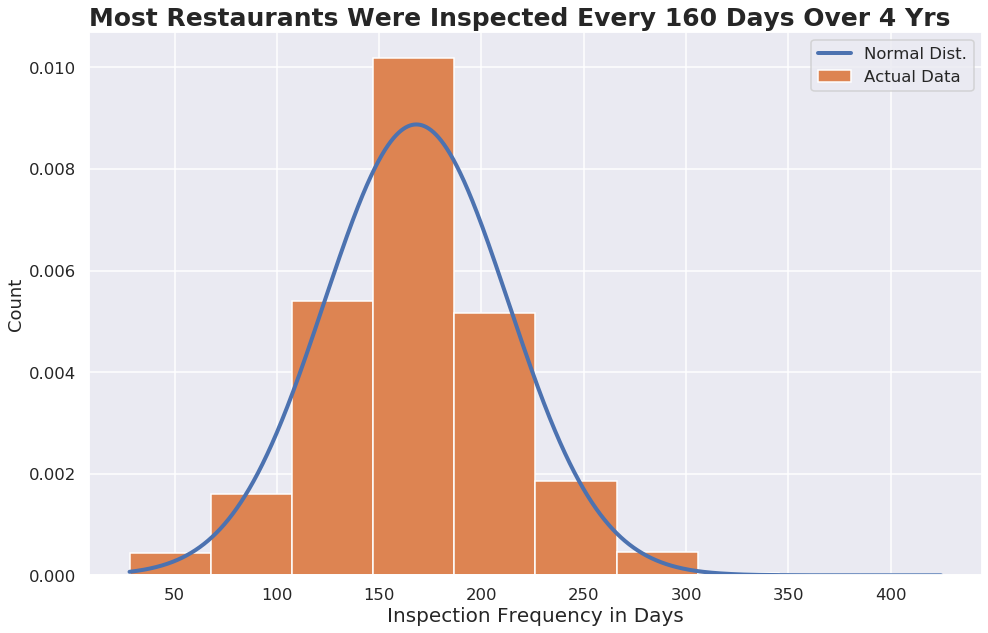

In [29]:
# Hypothetical, normal distribution
xs = np.arange(i_freq.min(), i_freq.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(i_freq), np.std(i_freq))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)

# Actual data plot 
plt.hist(i_freq, density = True, label = 'Actual Data');

# Labeling the visualization
plt.title('Most Restaurants Were Inspected Every 160 Days Over 4 Yrs', weight='bold', loc='left', fontsize=25)
plt.ylabel('Count')
plt.xlabel('Inspection Frequency in Days', fontsize=20)
plt.legend();

fig = plt.gcf()
fig.set_size_inches(16, 10)

From the visualization, it's clear that most restaurants were inspected at a frequency that aligned normally with the mean value. It's also clear that the min and max outlier values occur infrequently. Overall, the inspection frequency exhibits a normal distribution as most of the observations are aggregated around the central peak and the probabilities for values further away from the mean diminish equally in both directions.

Although the expected normal distribution doesn't fit the distribution of the data perfectly, the overall trend of the inspection frequency data aligns with the normality curve. This provides further evidence that the distribution of the actual inspection frequency data is relatively normal.

I also created plots for the average scores and yelp ratings of the restaurants in the dataframe to visualize the distribution of their values. 

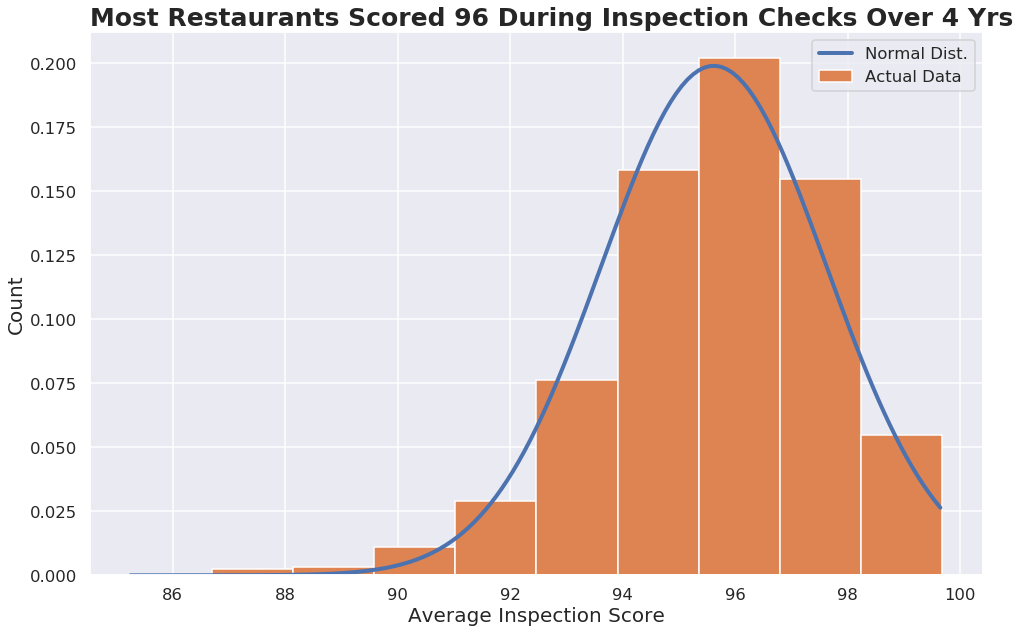

In [30]:
# Hypothetical, normal distribution
xs = np.arange(i_scores.min(), i_scores.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(i_scores), np.std(i_scores))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)

# Actual data plot 
plt.hist(i_scores, density = True, label = 'Actual Data');

# Labeling the visualization
plt.title('Most Restaurants Scored 96 During Inspection Checks Over 4 Yrs', weight='bold', loc='left', fontsize=25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Average Inspection Score', fontsize=20)
plt.legend();

fig = plt.gcf()
fig.set_size_inches(16, 10)

The visualization above illustrate how the average inspection score of the restaurants seem to exhibit a normal distribution. Most of the values congregate around the central peak and the probabilities for values further away from the mean diminish equally in both directions. Furthermore, these plots also demonstrate the lack of outlier values in our data for average inspection scores, which lends credence to the faithfulness of our data.

The expected normal distribution doesn't match the distribution of the data perfectly, but the overall trend of the average inspection score data aligns with the normality curve. This provides further evidence that the distribution of the actual inspection score data is relatively normal.

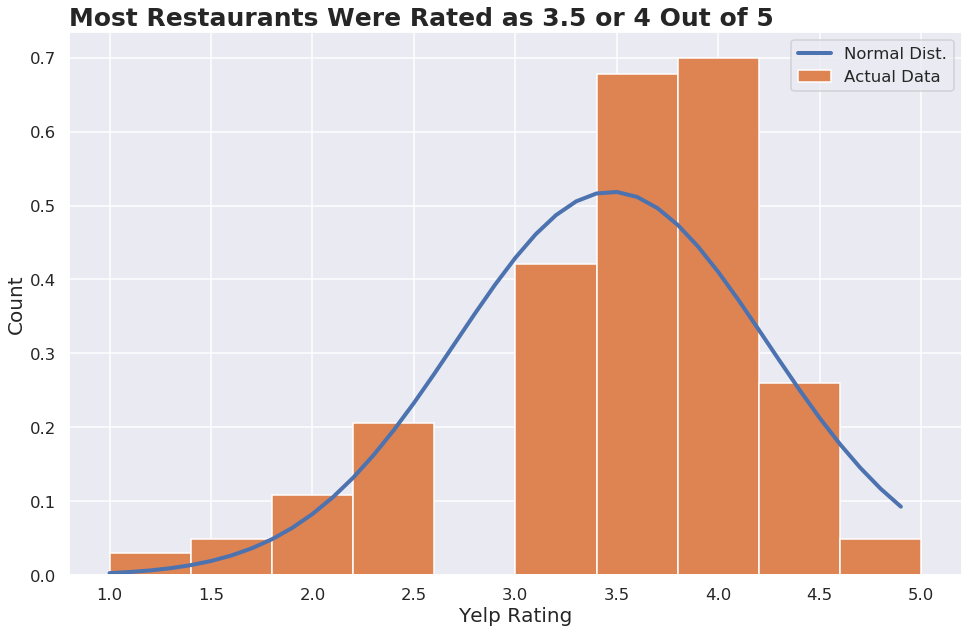

In [31]:
# Hypothetical, normal distribution
xs = np.arange(y_ratings.min(), y_ratings.max(), 0.1)
fit = stats.norm.pdf(xs, np.mean(y_ratings), np.std(y_ratings))
plt.plot(xs, fit, label = 'Normal Dist.', lw = 4)

# Actual data plot
plt.hist(y_ratings, density = True, label = 'Actual Data');

# Labeling the visualization
plt.title('Most Restaurants Were Rated as 3.5 or 4 Out of 5', weight='bold', loc='left', fontsize=25)
plt.ylabel('Count', fontsize=20)
plt.xlabel('Yelp Rating', fontsize=20)

plt.legend();

fig = plt.gcf()
fig.set_size_inches(16, 10)

The visualization above illustrate how the yelp ratings of the restaurants exhibit a less normal distribution. That being said, most of the values congregate around the central peak and the probabilities for values further away from the mean diminish similarly in both directions. 

The expected normal distribution doesn't align well with the distribution of the data. The actual data exhibits a greater frequency of the mean value of 3.5 than what is expected in the ideal, normal distribution. Still, most of the data in the Yelp ratings is consolidated within the range of values between 3 and 4. Furthermore, there are less data points corresponding to outlier values, such as 5 or 1, as compared to the frequency of values closer to the average. As a result, I believe the Yelp rating data is still faithful and remains viable for analysis.

## Variable Relationships

To explore some of the significant relationships pertaining to my research question, I drew scatterplots that explored the correlation between yelp ratings, average scores, and inspection frequency. In particular, I wanted to analyze the relationship between Yelp ratings and inspection frequency, along with Yelp ratings and average scores

In order to evaluate the correlation between Yelp ratings and the average inspection scores of restaurants, I plotted a scatter plot using these values as the axis labels. I also plotted the regression line to further visualize the overall trend in the relationship between Yelp ratings and average inspection scores of restaurants. 

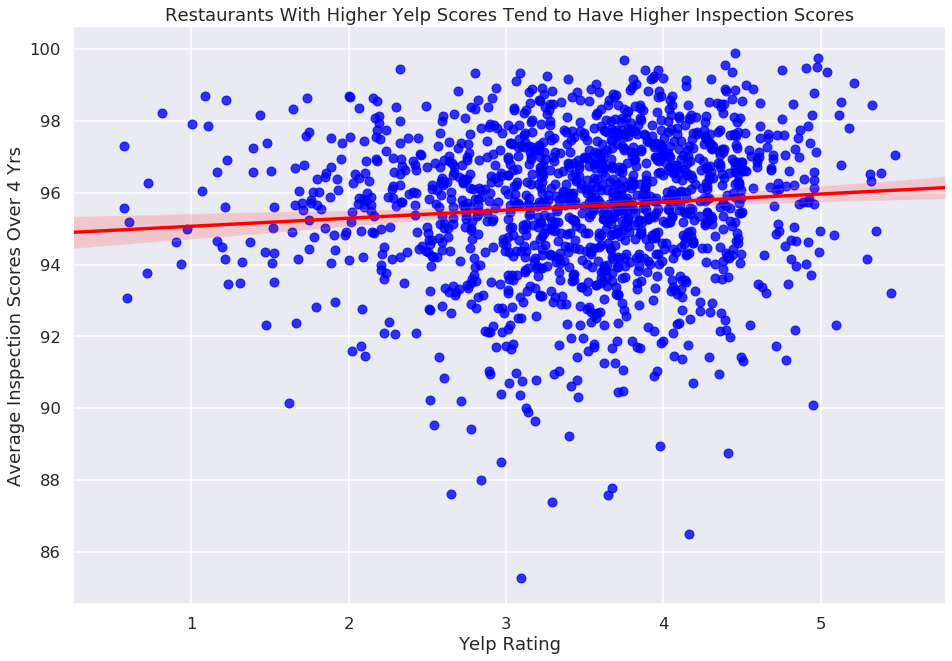

In [32]:
ax = sns.lmplot(data=df, 
               x='yelp_rating', y='avg_scores', 
               x_jitter = .5, y_jitter = .5,
               scatter_kws={"color": "blue"}, line_kws={"color": "red"});

ax.set(xlabel = 'Yelp Rating', ylabel = 'Average Inspection Scores Over 4 Yrs')
plt.title("Restaurants With Higher Yelp Scores Tend to Have Higher Inspection Scores")
fig = plt.gcf()
fig.set_size_inches(16, 10)

From the visualization above, it's difficult to extrapolate a relationship between Yelp ratings and average inspections scores from the data points alone. However, the regression line seems to indicate a positive relationship between the two variables, where having a higher Yelp rating tends to indicate a higher inspection score overall. The regression line shows that increases in yelp ratings correspond to increases in average inspection scores. 

I also wanted to explore the relationship between the average frequency of inspection checks and the Yelp ratings of restaurants. Thus, I plotted another scatter plot with these values as the axes labels. 

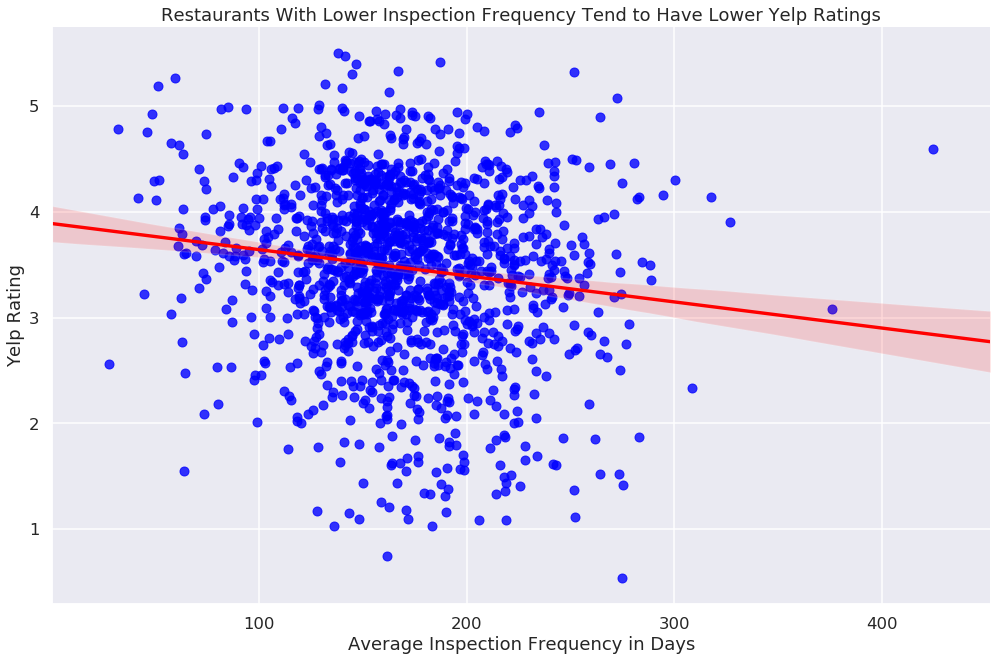

In [33]:
ax = sns.lmplot(data = df, 
               x='avg_inspection_freq', y='yelp_rating', 
               x_jitter = .5, y_jitter = .5, 
               scatter_kws={"color": "blue"}, line_kws={"color": "red"});

ax.set(xlabel = 'Average Inspection Frequency in Days', ylabel = 'Yelp Rating')
plt.title("Restaurants With Lower Inspection Frequency Tend to Have Lower Yelp Ratings")
fig = plt.gcf()
fig.set_size_inches(16, 10)

Again, from the visualization, it's difficult to determine the relationship between the average inspection frequency and Yelp ratings from the data points alone. However, the downward sloping regression line seems to indicate that restaurants with less frequent inspections tend to have worse Yelp ratings overall. The regression line shows that restaurants with decreasing inspection frequencies and by extension, increasing amount of days passed between each of their inspections, tend to correspond to lower Yelp ratings. 

# Analysis

The data visualizations have illustrated the distributions associated with the average inspection frequency, average inspection scores, and Yelp rating data. The plots also provided a baseline evaluation of the relationship between average inspection frequency and Yelp rating and the relationship between Yelp rating and average inspections score. 

Here, I utilized Pearson correlation to examine the association between the three aforementioned variables and gauge the actual **strength** of their relationships.

In [34]:
corrs = df.corr(method='pearson')
corrs

,avg_scores,avg_inspection_freq,yelp_rating
avg_scores,1.000000,0.046768,0.086146
avg_inspection_freq,0.046768,1.000000,-0.144279
yelp_rating,0.086146,-0.144279,1.000000


The correlation between two variables is stronger as the r value approaches either -1 or 1. By contrast, the correlation between two variables is weaker as the r value approaches 0.

In the case of our diagram, it appears that the correlation between Yelp ratings and average inspection scores is relatively weak, with the r value being 0.086. Similarly, the correlation between average inspection frequency and Yelp ratings is measured with an r value of -0.14. 

Because the r values are close to 0, it can be noted that the strength of the relationships between the variables is low. The correlations between Yelp rating and average inspection score, as well as average inspection frequency and Yelp rating, are weak.

To further explore this outcome, I created an OLS model that attempts to predict the average inspection score of restaurants using Yelp ratings. I utilized this linear regression model because it can provide valuable information such as, R-squared, standard errors, and P-values that shed light on the actual impact of one variable on another.  

In [35]:
outcome_1, predictors_1 = patsy.dmatrices('avg_scores ~ yelp_rating', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()

In [36]:
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:             avg_scores   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     10.69
Date:                Tue, 09 Jun 2020   Prob (F-statistic):            0.00110
Time:                        05:05:03   Log-Likelihood:                -3022.2
No. Observations:                1432   AIC:                             6048.
Df Residuals:                    1430   BIC:                             6059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      94.8419      0.244    388.372      

We can analyze the regression results to further evaluate the strength of the relationship between Yelp ratings and average inspection scores.

The p value is quite low at 0.01. If we consider using an alpha significance level of 0.05, the p value is lower than 0.05, which indicates that we should reject the null hypothesis and consider that there is a significant relationship between Yelp ratings and average inspection scores. However, we need to evaluate more metrics to soldify this conclusion.

R-squared is the percentage of the outcome variable variation that can be explained by the linear model. In our case, 0.007% of the variation in average inspection scores is explained by the predictor of Yelp ratings. Furthermore, the coefficient for Yelp rating dictates that every 1 unit increase in Yelp ratings entails a 0.2245 increase in average inspection scores. 

By analyzing R-squared and the coefficient score, it can be concluded that Yelp ratings do not have a significant impact on the average inspection score of restaurants. Most of the variation in average inspection scores cannot be explained by the ratings and each 1 unit increase in ratings does not impact average inspection scores in a significant manner. Despite the p value affirming the strength of the alternative hypothesis, these additional metrics lend credence to the notion that Yelp ratings are not a reliable indicator of inspection scores.

I created another OLS model to evaluate the impact of average inspection frequency on Yelp ratings.

In [37]:
outcome_2, predictors_2 = patsy.dmatrices('yelp_rating ~ avg_inspection_freq', df)
mod_2 = sm.OLS(outcome_2, predictors_2)
res_2 = mod_2.fit()

In [38]:
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:            yelp_rating   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     30.40
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           4.16e-08
Time:                        05:05:03   Log-Likelihood:                -1641.0
No. Observations:                1432   AIC:                             3286.
Df Residuals:                    1430   BIC:                             3297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               3.8883    

The p value is quite low at 0.0. If we consider using an alpha significance level of 0.05, the p value indicates that we should reject the null hypothesis and consider that there is a significant relationship between Yelp ratings and average inspection frequency. However, we need to evaluate more metrics to soldify this conclusion.

The R-squared value is 0.021, which indicates that only 0.021% of the variation in Yelp ratings is explained by the predictor of average inspection frequency. Furthermore, the coefficient for Yelp rating dictates that every 1 unit increase in average inspection frequency (waiting 1 extra day before another inspection) entails a -0.0025 decrease in Yelp rating. This matches the trend of our previous visualizations, which displayed a negative trend between Yelp ratings and average inspection frequency. Intuitively, it's also reasonable to consider that restaurants with lower frequencies of inspection may have lower Yelp ratings. 

However, by analyzing R-squared and the coefficient score, it can be concluded that average inspection frequency does not have a significant impact on the Yelp ratings of restaurants. Most of the variation in Yelp ratings cannot be explained by the average inspection frequency and each additional day between inspections does not impact Yelp ratings in a significant manner. Despite the p value affirming the strength of the alternative hypothesis, these additional metrics lend credence to the notion that average inspection frequency is not a reliable indicator of yelp ratings.

# Ethics & Privacy

Because health inspection data is conducted by the local government, it is accessible to the public domain. All restaurants are subjected to health inspection checks to remain open. Customers are entitled to understand the health violation records of restaurants before they purchase their meals. Therefore, the health inspection records of restaurants remains open to the public. For these reasons, it is permissible to utilize public records of health inspection during the data analysis of this project.  

According to the Yelp dataset FAQ found here, https://www.yelp.com/dataset/documentation/faq, college instructors can distribute Yelp datasets for class assignments so long as students of the course obey their Terms of Use. Their Terms of Use dictates that students who utilize the dataset cannot use their data to serve any commercial purpose or distribute the data to a third party, website or medium. I'm not utilizing this data for any commercial benefit and the data analysis will only be seen by the instructing staff, which eliminates the existence of a third party. Because I'm obeying the ToS, I have sufficient permission to utilize the Yelp dataset for this project. 

In terms of privacy concerns, all personally identifiable information has been scraped from the datasets before the data analysis. For example, the inspections dataset originally contained human-level data about the inspectors, which included their names and inspector identification. This information was removed from the dataframes before analysis. Ultimately, each row in both the Yelp and inspection dataframes, contain observations that are strictly contained at the restaurant level. While there are phone numbers present in these datasets, they reveal information about the restaurants rather than any individuals. Because the data analysis doesn't reveal any personally identifiable information, my project does not violate privacy concerns for individuals.

The Yelp dataset is shaped based off the observations of human reviewers. For this reason, there may be biases present within the Yelp ratings. Some reviewers may subject restaurants to higher standards than others and apply reductions to the ratings of the restaurants accordingly. However, Yelp aggregates all of the reviews for a restaurant when computing the overall rating. Because of this process, outlier ratings that are created by biased reviewers are overshadowed by the consensus of the Yelp reviewers for a particular restaurant. For example, this review https://www.yelp.com/biz/mr-bibi-oceanside, shows a restaurant that is rated as 5/5. However, there are 9 reviewers who gave the restaurant 4/5. Yelp provides a restaurant rating based off majority consensus, thereby negating the biased values. As a result, I believe the bias is already mitigated to a significant degree when the Yelp data is utilized during my analysis. 

Because the health inspection scores are measured by human inspectors, some of the inspection data contained erroneous values that would have produced biases within the data analysis. For example, many restaurant inspections results were recorded with null values for previous inspections, as some checks were conducted on restaurants for the first time. I replaced these voided values with their appropriate subsitutions to ensure the overall dataset was viable for usage during analysis. Furthermore, to further mitigate the potential biases of the dataset, I utilized the average values of the inspection results for each restaurant, measured over a span of 4 years. By utilizing the average inspection score and frequency for analysis, I ensured that I was analyzing inspection data for restaurants that were compiled based on the consensus of 4-years worth of inspections, rather than each individual inspection. This prevented outlier values, produced from potentially biased inspectors, from skewing the analysis in a siginficant manner. 

My data analysis could have potentially produced unethical implications if it revealed that there was a strong correlation between inspection scores and Yelp ratings. Many users are able to post reviews on Yelp, without moderation. This conclusion could have enabled malicious users to intentionally submit falsified reviews of restaurants to decrease the perception of their cleanliness. However, my data analysis ultimately reveals no strong correlation between Yelp ratings and inspection scores. 

In summary, I have permission to utilize the health inspection data because it is accessible by the public domain. By following Yelp's Terms of Service, I can use their data for my analysis. All personally identifiable information has been removed from the datasets prior to the analysis, therefore, my project follows standard privacy practices. The Yelp data may have been formed from biased reviewers, however, the overall rating allocated to each restaurant is compused based on the consensus scoring of all reviewers. Similarly, the inspection scores have been averaged using all of the observations across the 4 year timespan of the inpsections dataset, negating the impact of any outlier values resulting from biased inspections of restaurants. Ultimately, because the Yelp and inspection data used for analysis was formed based on the average consensus of majority observations, I believe much of the analytical bias has been reduced. 

# Conclusion & Discussion

The data analysis of this project serves to answer the following questions: can health inspectors reliably gauge the inspection scores of restauraunts, within North Carolina, using their associated Yelp ratings and can inspection frequency impact the Yelp evaluations of these particular restaurants. In order to answer these questions, I evaluated public health inspection data and examined Yelp ratings for the restaruants centerd in this region. The actual data analysis revolved around a single dataframe, which combined the average inspection scores and frequency of these restaurants, over a 4 year time period, with their corresponding Yelp ratings. 

To first visualize the relationship between Yelp ratings and inspection scores, averaged over 4 years, I created a scatterplot with these variables on the axes. The regression line of this plot exhibited a positive slope, which indicated that restaurants with higher Yelp ratings had higher average inspection scores. Similarly, I created a scatterplot to explore the relationship between inspection frequency, averaged over 4 years, and Yelp ratings. The regression line of this plot exhibited a negative slope, which indicated that restaurants with less frequent inspections had lower Yelp ratings. In order to verify the accuracy of these results, I utilized a Pearson correlation to determine the actual strength of association between these variables. The r value of the correlation between Yelp ratings and average inspection score was quite low at 0.086, which indicated a weak relationship between the two. Similarly, the r value of the correlation between average inspection frequency and Yelp ratings was marked at -0.14, meaning the relationship between these variables is also weak. To futher evaluate the strength of these associations, I produced OLS models that used Yelp ratings to predict average inspection scores and used average inspection frequency to predict Yelp ratings. The coefficients and R-squared values for both of these models were low, leading me to arrive to the conclusions that Yelp ratings are not a reliable indicator of average inspection score and that inspection frequency is not a reliable gauge of Yelp ratings. There is no significant relationship between Yelp ratings and inspection scores for restaurants in the North Carolina region, thus inspectors should not utilize Yelp ratings to gauge the cleanliness of restaurants or priortize their inspection checks based on Yelp ratings. Similarly, there seems to be no correlation between inspection frequency and Yelp ratings. 

The limitations of my analysis centered on the temporality of the datasets and the number of observations associated with each restaurant. The health inspections dataset contained a date for every inspection that occurred for each restaurant in the North Carolina region, across a four year period. This allowed me to average the inspection score and frequency values over the four year period when the measurements took place. By contrast, the Yelp dataset only contained a single rating for each restaurant in the region, with no measure of temporality. Thus, when comparing the averaged inspection values against the Yelp ratings for each restaurant, it was difficult to evaluate how changes to Yelp rating altered inspection score overtime. This same issue persisted when I was evaluating the relationship between average inspection frequency and Yelp ratings. Despite these limitations, I think my data analysis still provides valuable insight into the data distribution of inspection checks and Yelp ratings. I believe my project can also impact society by reaffirming the importance of examining data before arriving at a conclusion. My predictions of Yelp ratings corresponding to higher inspection scores and higher inspection frequency corresponding to increased Yelp ratings, seemed intuitive at the outset of this project. However, the analysis reveals these variables don't share strong relationships. Ultimately, these results highlight the importance of vetting conclusions before disseminating information to the masses and enabling others to corroborate their conjectures with real data.  